<a href="https://colab.research.google.com/github/AuroraaaMS/EDA_FundamentosML_AuroraMansilla/blob/main/Evaluacion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #Importación de las librerías

In [10]:
from google.colab import files

uploaded = files.upload() #Importación del archivo

Saving data.csv to data (1).csv


In [14]:
df = pd.read_csv("data.csv", encoding='latin-1')
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


En esta sección se puede observar que se presentan los diversos tipos de variables. Siendo divididas en:

Variables cuantitativas discretas: InvoiceNo, Quantity, InvoiceDate
Variables cuantitativas continuas: UnitPrice

Variables cualitativas nominales: StockCode, Description, CustomerID, Country

In [15]:
display(df.head()) #Visualización de los datos ene general

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [18]:
print("Valores nulos en cada columna:")
print(df.isnull().sum())

Valores nulos en cada columna:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


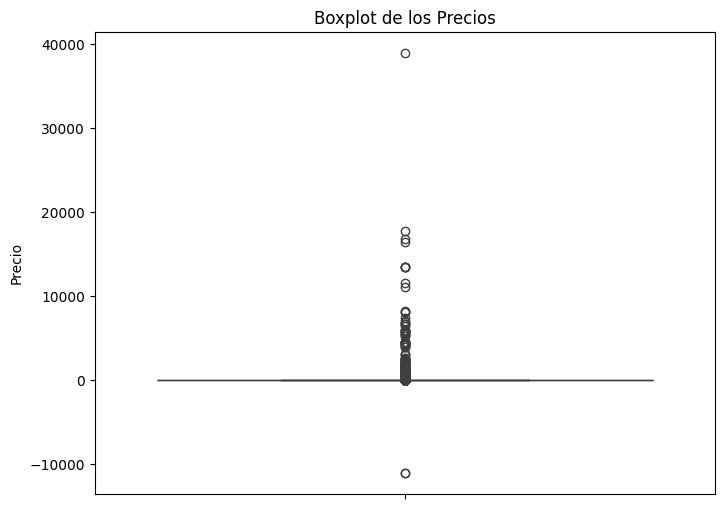

In [25]:


import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['UnitPrice'])
plt.title('Boxplot de los Precios')
plt.ylabel('Precio')
plt.show()


Aquí podemos observar la tendencia central de precios con unos cuantos valores atípicos que se disperan más hacia los extremos en valor unitario.

In [23]:
df_numeric = df.select_dtypes(include=['number'])

stats = df_numeric.agg(['mean', 'median', 'std', 'var', 'min', 'max'])

stats.loc['range'] = stats.loc['max'] - stats.loc['min']

stats.loc['coef_var'] = (stats.loc['std'] / stats.loc['mean']) * 100

display(stats)

,Quantity,UnitPrice,CustomerID
mean,9.552250,4.611114,1.528769e+04
median,3.000000,2.080000,1.515200e+04
std,218.081158,96.759853,1.713600e+03
var,47559.391409,9362.469164,2.936426e+06
min,-80995.000000,-11062.060000,1.234600e+04
max,80995.000000,38970.000000,1.828700e+04
range,161990.000000,50032.060000,5.941000e+03
coef_var,2283.034554,2098.405307,1.120902e+01


In [24]:


price_stats = df['UnitPrice'].describe()

# Add range and coefficient of variation
price_stats['range'] = price_stats['max'] - price_stats['min']
price_stats['coef_var'] = (price_stats['std'] / price_stats['mean']) * 100

price_stats


,UnitPrice
count,541909.000000
mean,4.611114
std,96.759853
min,-11062.060000
25%,1.250000
50%,2.080000
75%,4.130000
max,38970.000000
range,50032.060000
coef_var,2098.405307


Como se puede observar en la tabla acerca de los precios presentada previamente la desviación estándar es de 96.7, lo cual es bastante alto ya que se aleja de la media que es de 4.6. El rango también es bastante amplio al dejar un intervalo de 50032.